In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv('../Dataset/data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [10]:
df.isnull().sum()
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * mis_val / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_rencolumns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    return mis_val_table_rencolumns

print(missing_values_table(df))


                        Missing Values  % of Total Values
enrollee_id                          0           0.000000
city                                 0           0.000000
city_development_index             479           2.500261
gender                            4508          23.530640
relevent_experience                  0           0.000000
enrolled_university                386           2.014824
education_level                    460           2.401086
major_discipline                  2813          14.683161
experience                          65           0.339284
company_size                      5938          30.994885
company_type                      6140          32.049274
training_hours                     766           3.998330
target                               0           0.000000


In [12]:
df.shape

(19158, 13)

In [29]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [31]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
8152,0.887,no_enrollment,Graduate,15.0,86.0
17896,0.762,no_enrollment,Graduate,20.0,42.0
8599,0.920,no_enrollment,Graduate,1.0,18.0
3670,0.939,no_enrollment,Graduate,17.0,46.0
18266,NaN,no_enrollment,Masters,20.0,33.0


In [32]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [33]:
new_df = df[cols].dropna()
new_df.shape, df.shape

((17182, 5), (19158, 13))

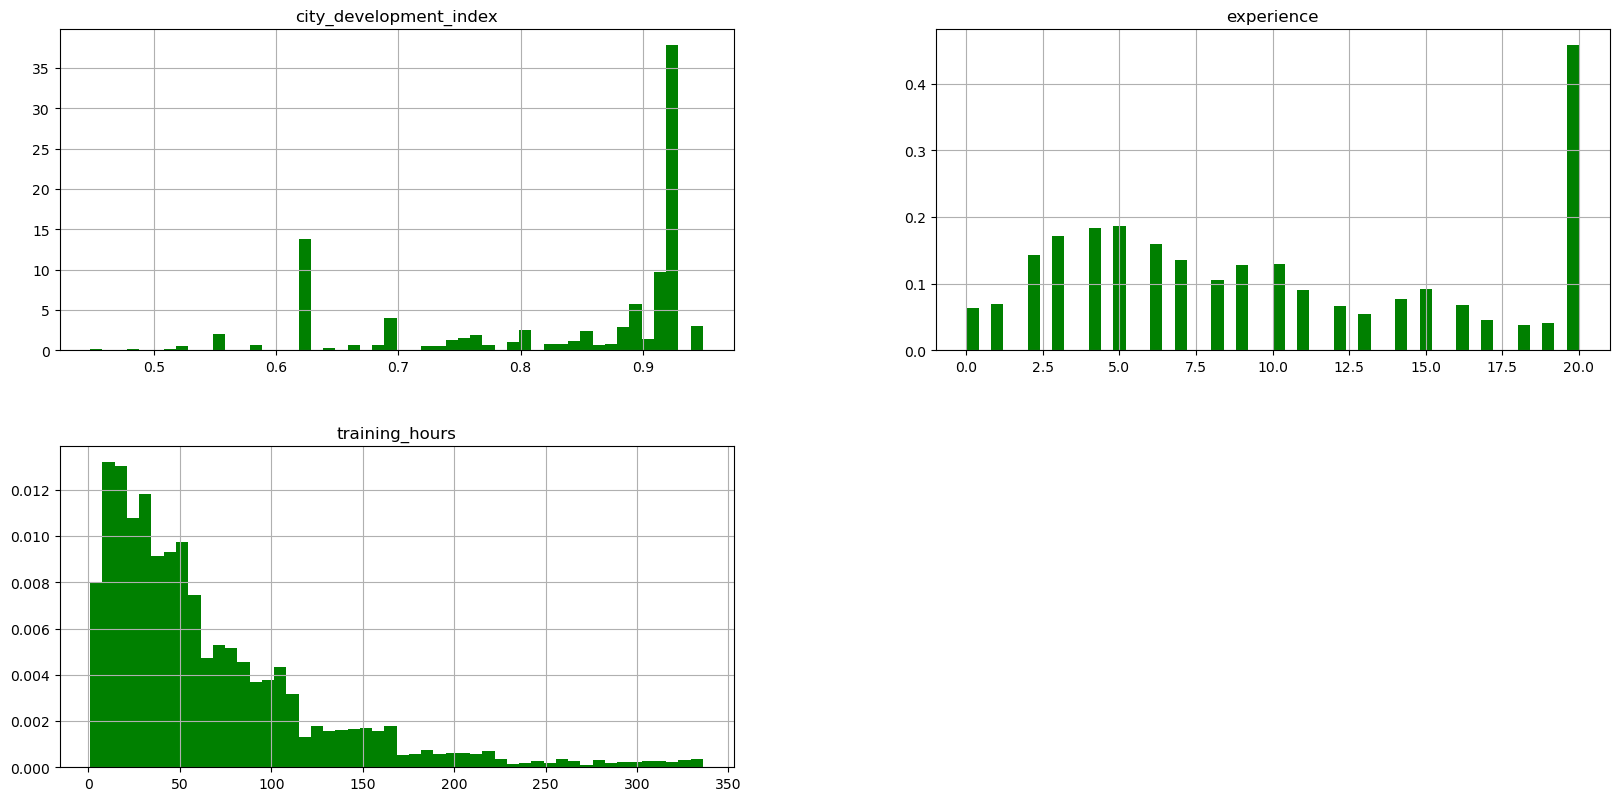

In [34]:
new_df.hist(bins=50,density=True,figsize=(20,15),layout=(3,2),color='green')
plt.show()

<Axes: >

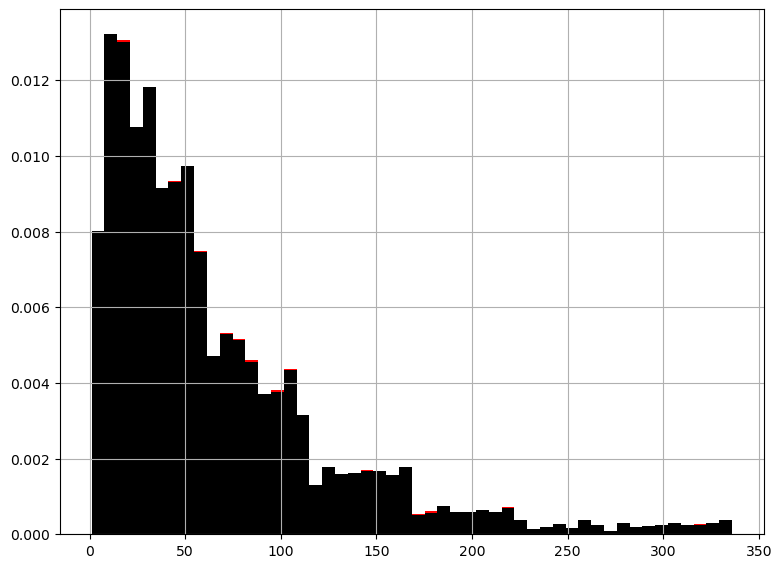

In [37]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(221)

#orginaL DATA
df['training_hours'].hist(ax=ax,bins=50,density=True,color='red')


#new data
new_df['training_hours'].hist(ax=ax,bins=50,density=True,color='black')